In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_54554_R')

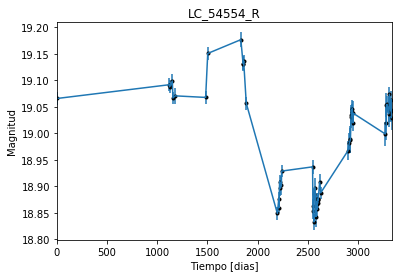

In [2]:
data = np.genfromtxt('LC_54554_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_54554_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

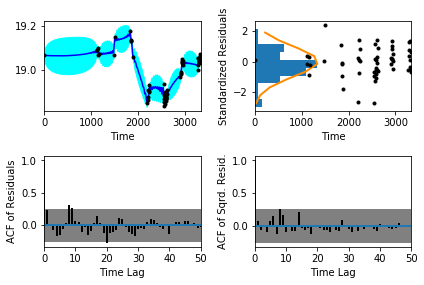

In [5]:
sample.assess_fit()

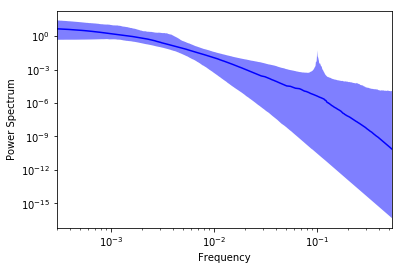

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_54554_R')

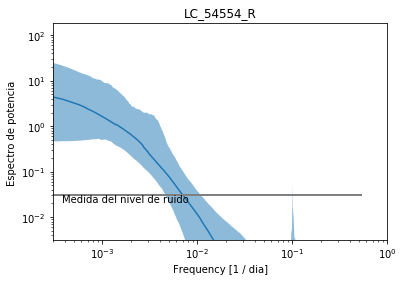

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_54554_R')

Text(0.5,1,'Prediccion , valor esperado LC_54554_R')

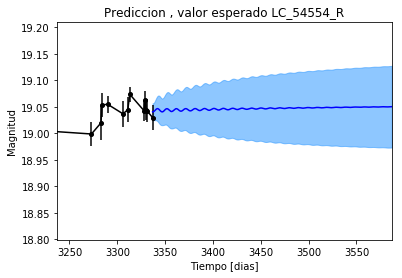

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_54554_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_54554_R')

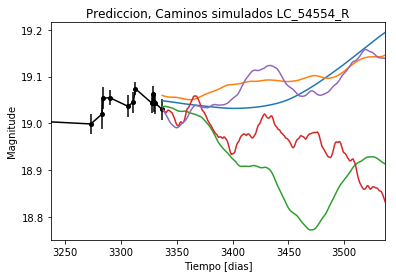

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_54554_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_54554_R')

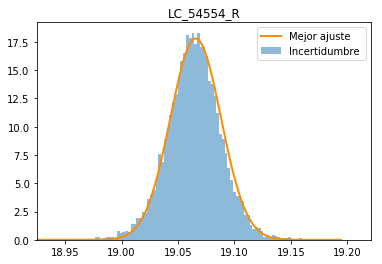

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_54554_R')

Text(0.5,1,'Interpolacion, camino simulado 54554_R')

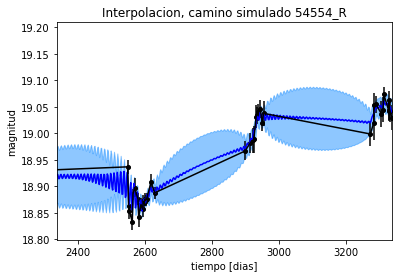

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado 54554_R')

Text(0.5,1,'Interpolacion, camino simulado LC_54554_R')

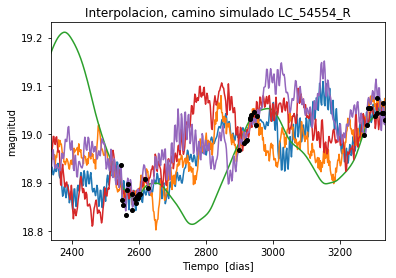

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_54554_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 468.45652721
Median: 0.00632758107583
Standard deviation: 0.157737517505
68% credibility interval: [ 0.00073627  0.09680411]
95% credibility interval: [  3.56355039e-04   6.55281705e-01]
99% credibility interval: [  3.16191463e-04   9.31772890e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 534.456411344
Median: 0.00271657767962
Standard deviation: 0.0862511500963
68% credibility interval: [ 0.00054687  0.03185406]
95% credibility interval: [ 0.00034715  0.28188894]
99% credibility interval: [  3.13646293e-04   5.83256668e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 503.187446861
Median: 0.0408043016535
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 250.008309299
Median: 146.210984701
Standard deviation: 2.35902446695
68% credibility interval: [ 144.27070419  148.10781608]
95% credibility interval: [ 141.55223169  151.20753063]
99% credibility interval: [ 139.12495838  151.33948963]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 365.843812022
Median: 0.62997472658
Standard deviation: 2.14791424493
68% credibility interval: [ 0.05138825  3.69733138]
95% credibility interval: [ 0.01694206  7.10685703]
99% credibility interval: [  0.01136453  10.28758544]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 280.323004314
Median: 0.628373779595
Standard deviation: 11.3838455416
68% credibility interval: [  0.0568371   15.90026562]
95% credibility interval: [  2.94178727

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 836.968933548
Median: 2.22899572615e-31
Standard deviation: 2.70602941042e+29
68% credibility interval: [  1.14646136e-72   9.80634337e-05]
95% credibility interval: [  2.58373252e-101   3.83695844e+001]
99% credibility interval: [  4.06082734e-116   2.06741759e+028]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1516.19097532
Median: 19.0211274236
Standard deviation: 0.0517817824317
68% credibility interval: [ 18.97914013  19.06694852]
95% credibility interval: [ 18.92878621  19.1248823 ]
99% credibility interval: [ 18.86913655  19.18266626]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 461.47415628
Median: 0.100378581326
Standard deviation: 0.293263128022
68% credibility interval: [ 0.          0.56126388]
95% credibility interval: [ 0.          0.98314406]
99% credibility interval: [ 0.          1.04503878]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 461.47415628
Median: 0.100378581326
Standard deviation: 0.293263128022
68% credibility interval: [ 0.          0.56126388]
95% credibility interval: [ 0.          0.98314406]
99% credibility interval: [ 0.          1.04503878]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 281.442433726
Median: 0.0
Standard deviation: 0.00087762024009
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 250.008309299
Median: 146.210984701
Standard deviation: 2.35902446695
68% credibility interval: [ 144.27070419  148.10781608]
95% credibility interval: [ 141.55223169  151.20753063]
99% credibility interval: [ 139.12495838  151.33948963]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1468.88922824
Median: 0.0124792583218
Standard deviation: 0.0182904716426
68% credibility interval: [ 0.00758069  0.0226191 ]
95% credibility interval: [ 0.00518647  0.05498956]
99% credibility interval: [ 0.00409747  0.11389861]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 354.275296741
Median: 1.10181955082
Standard deviation: 0.2281853049
68% credibility interval: [ 0.88135516  1.35695345]
95% credibility interval: [ 0.74246264  1.5977743 ]
99% credibility interval: [ 0.65492299  1.80972355]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 436.45612278
Median: 0.000508287061184
Standard deviation: 0.161436616361
68% credibility interval: [  1.67894927e-05   3.99090231e-02]
95% credibility interval: [  2.38735449e-07   4.61588207e-01]
99% credibility interval: [  6.19439463e-34   1.19293635e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 468.45652721
Median: (-0.0397573644457-0.428385852823j)
Standard deviation: 2.09225718386
68% credibility interval: [-0.60823816-5.71953362j -0.00462609-0.60495557j]
95% credibility interval: [ -4.11725638e+00-5.31673829j  -2.23904475e-03-0.61489426j]
99% credibility interval: [ -5.85450173e+00+0.j          -1.98668955e-03-6.45716397j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 534.456411344
Median: (-0.0170687609624+0.013208444353j)
Standard deviation: 1.92066731917
68% credibility interval: [-0.20014495+0.71269402j -0.00343611+0.38141446j]
95% credibility interval: [-1.77116048+4.3987141j  -0.00218124+0.83204771j]
99% credibility interval: [ -3.66470973e+00+4.69507332j  -1.97069778e-03+0.62599637j]
Posterior sum